In [7]:
#importing the graphlab
import graphlab as gl

In [8]:
#importing the input data into graphlab SFrame dataset
crimeData = gl.SFrame.read_csv("Philadelphia_Crime_Rate_noNA.csv")
crimeData

Finished parsing file C:\learn\ML\Regression\week1\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.036002 secs.

Finished parsing file C:\learn\ML\Regression\week1\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.032002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [9]:
# setting plot canvas to this IPython notebook
gl.canvas.set_target('ipynb')

# plotting scatter plot 
crimeData.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

In [10]:
# Calculating Linear Regression model

crimeData_model = gl.linear_regression.create(crimeData, target='HousePrice', features=['CrimeRate'],validation_set=None,verbose=False)

In [11]:
crimeData_model.coefficients

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [12]:
#importing matplotlib library for plotting

import matplotlib.pyplot as plt
%matplotlib inline

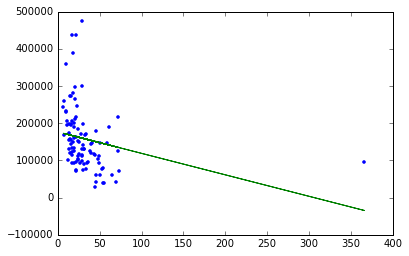

In [15]:
plt.plot(crimeData['CrimeRate'],crimeData['HousePrice'],'.',
        crimeData['CrimeRate'],crimeData_model.predict(crimeData),'-')

In [17]:
# Tryting the same linear model withput high influencial point

crimeData_woHI = crimeData[crimeData['HousePrice'] != 96200]

In [18]:
crimeData_woHI_model = gl.linear_regression.create(crimeData_woHI, target='HousePrice', features=['CrimeRate'],validation_set=None,verbose=False)

In [20]:
# getting linear model coefficients
crimeData_woHI_model.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


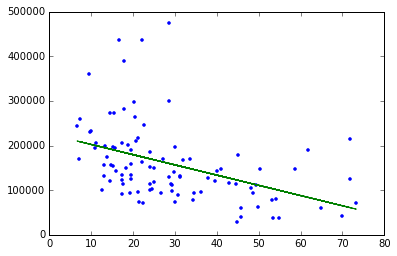

In [22]:
plt.plot(crimeData_woHI['CrimeRate'],crimeData_woHI['HousePrice'],'.',
        crimeData_woHI['CrimeRate'],crimeData_woHI_model.predict(crimeData_woHI),'-')